In [233]:
import numpy as np
import matplotlib.pyplot as plt
import random
grid = np.genfromtxt('roadmap.csv',delimiter =',')
%matplotlib inline



In [243]:
def road(grid):
    x , y = grid.shape
    hor = []
    vert = []
    for i in range(x):
        if grid[i,0] == 1:
            hor.append(i)
    for j in range(y):
        if grid[0,j] == 1:
            vert.append(j)
    return hor, vert
    
def initial_grid(dmin = 0, dmax = 20):
    
    grid = np.genfromtxt('roadmap.csv',delimiter =',')
    car_position = np.zeros((len(grid),len(grid),4))
    x , y = road(grid)
    for k in range(4):
        for i in range(len(grid)):
            for j in range(len(grid)):
                if grid[i,j] == 0:
                    car_position[i,j] = 0
        else:
            for n in range(len(x)):
                for j in range(len(grid)):
                    car_position[x[n],j,0] = random.randint(dmin,dmax)
                    car_position[x[n],j,1] = random.randint(dmin,dmax)
            for m in range(len(y)):
                for i in range(len(grid)):
                    car_position[i,y[m],3] = random.randint(dmin,dmax)
                    car_position[i,y[m],2] = random.randint(dmin,dmax)
    return car_position


In [252]:
carmap = initial_grid(5,10)

In [253]:
def is_intersection(grid,i,j):
    #top = grid[i,j+1] == 1
    #bottom = grid[i, j-1] == 1
    #left = grid[i-1,j] == 1
    #right = grid[i+1,j] == 1
    if j == 0:
        top = grid[i,-1] == 1
    else:
        top = grid[i,j-1] == 1
    if j == (grid.shape[1]-1):
        bottom = grid[i,0] == 1
    
    else:
        bottom = grid[i, j+1] == 1
    if i == 0:
        left = grid[-1,j] == 1
    else:
        left = grid[i-1,j] == 1
    if i == (grid.shape[1]-1):
        right = grid[0,j] == 1
    else:
        right = grid[i+1,j] == 1
    return top and bottom and left and right

In [254]:
def neighbors(carmap, i, j):
    """ x = j
        y = i
    """
    

    directions = {'n':(i-1,j), 'e':(i,j+1), 'w':(i,j-1), 's':(i+1,j)}
    if i == 0:
        directions['n'] = (carmap.shape[0]-1, j)
    if i == carmap.shape[0]-1:
        directions['s'] = (0,j)
    if j == 0:
        directions['w'] = (i,carmap.shape[1]-1)
    if j == carmap.shape[0]-1:
        directions['e'] = (i,0)
    return directions

In [214]:
x,y = road(grid)

for i in range(20):
    for j in range(20):
  
        n= neighbors(carmap, i,j, x, y)
        print(i,j,n)

0 0 {'w': (0, 14, 2), 's': (1, 0, 3), 'e': (0, 1, 1), 'n': (14, 0, 0)}
0 1 {'w': (0, 0, 2), 's': (1, 1, 3), 'e': (0, 2, 1), 'n': (14, 1, 0)}
0 2 {'w': (0, 1, 2), 's': (1, 2, 3), 'e': (0, 3, 1), 'n': (14, 2, 0)}
0 3 {'w': (0, 2, 2), 's': (1, 3, 3), 'e': (0, 4, 1), 'n': (14, 3, 0)}
0 4 {'w': (0, 3, 2), 's': (1, 4, 3), 'e': (0, 5, 1), 'n': (14, 4, 0)}
0 5 {'w': (0, 4, 2), 's': (1, 5, 3), 'e': (0, 6, 1), 'n': (14, 5, 0)}
0 6 {'w': (0, 5, 2), 's': (1, 6, 3), 'e': (0, 7, 1), 'n': (14, 6, 0)}
0 7 {'w': (0, 6, 2), 's': (1, 7, 3), 'e': (0, 8, 1), 'n': (14, 7, 0)}
0 8 {'w': (0, 7, 2), 's': (1, 8, 3), 'e': (0, 9, 1), 'n': (14, 8, 0)}
0 9 {'w': (0, 8, 2), 's': (1, 9, 3), 'e': (0, 10, 1), 'n': (14, 9, 0)}
0 10 {'w': (0, 9, 2), 's': (1, 10, 3), 'e': (0, 11, 1), 'n': (14, 10, 0)}
0 11 {'w': (0, 10, 2), 's': (1, 11, 3), 'e': (0, 12, 1), 'n': (14, 11, 0)}
0 12 {'w': (0, 11, 2), 's': (1, 12, 3), 'e': (0, 13, 1), 'n': (14, 12, 0)}
0 13 {'w': (0, 12, 2), 's': (1, 13, 3), 'e': (0, 14, 1), 'n': (14, 13, 0)}

In [206]:
n

{'e': (4, 5), 'n': (3, 4), 's': (5, 4), 'w': (4, 3)}

In [255]:
dir_ = {'n': 1,
        'e': 0,
        's': 2,
        'w': 3}

In [266]:
def motion(carmap, lim=20):
    #lim = 10
    cm = carmap
    new_m = np.zeros_like(cm)
    new_m[:] = cm[:]
    x,y = road(grid)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            
            n = neighbors(cm, i, j)
            n2 = neighbors(cm, i+1, j+1)
            for k in dir_:
                current = (i,j, dir_[k])
                past = (i-1, j-1, dir_[k])
                new = n[k] + tuple([dir_[k]])
                new2 = n2[k] + tuple([dir_[k]])
                #if False: # avoiding intersection conditions
                    #is_intersection(grid, i,j)
                if cm[current] <= (lim - cm[new]):
                    new_m[new] = cm[current]
                    new_m[current] = 0

                else:
                    new_m[current] = cm[current] + (cm[new] - lim)
                    new_m[new] = lim

                #else:
                 #   new_m[current] = 0#here is if we are in an intersection
                    #lim_intersection is equal to max capacity of neighbors to start off
                    '''lim_intersection = lim *4
                    cm[current] == 0
                      #this check is neighbors of intersection point
                    if cm[new] <= lim_intersection: #asking if the # of cars at intersec is ok
                        # here I'm going to basically copy the lane movement for ease of work
                        if cm[new] == 0:
                            new_m[new] = cm[past]
                            cm[current]+= cm[past]
                            new_m[past] = 0
                        if cm[new] == lim:
                            new_m[past] = cm[past]
                            cm[current] = 0
                        else:
                            if cm[new] > 0 and cm[new] < lim:
                                if cm[past] + cm[new] <= lim:
                                    new_m[new] += cm[past]
                                    new_m[past] = 0
                                    cm[current] = cm[past]
                            else:
                                enroute2 = (lim - cm[new])
                                new_m[new] += enroute2
                                new_m[past] -= enroute2
                                cm[current] = enroute2
                    if cm[new] > lim_intersection:
                        enroute3 = (lim - cm[new])
                        turns = lim_intersection // 4
                        if turns >= enroute3:
                            if cm[new] == 0:
                                new_m[new] += turns
                                new_m[past] -= turns
                            if cm[new] == lim:
                                new_m[past] = cm[past]
                            else:
                                if cm[new] > 0 and cm[new] < lim:
                                    if cm[past] + cm[new] <= lim:
                                        new_m[new] += turns
                                        new_m[past] = 0
                                else:
                                    enroute3 = (lim - cm[new])
                                    new_m[new] += enroute3
                                    new_m[past] -= enroute3
                        elif enroute3 > turns:
                            if cm[new] == 0:
                                new_m[new] += turns
                                new_m[past] -= turns
                            if cm[new] == lim:
                                new_m[past] = cm[past]
                            else:
                                if cm[new] > 0 and cm[new] < lim:
                                    if cm[past] + cm[new] <= lim:
                                        new_m[new] += turns
                                        new_m[past] = 0
                                else:
                                    enroute3 = (lim - cm[new])
                                    new_m[new] += enroute3
                                    new_m[past] -= enroute3
                        new_m[current] == 0'''
    return new_m

In [224]:
for k in dir_:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-224-6744b964e225>, line 2)

In [267]:
car_position = motion(carmap)

In [265]:
car_position[:,:,3]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

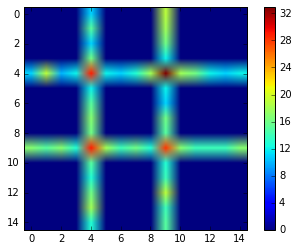

In [272]:
def plot(carmap, view=[]):
    if not len(view) ==0:
        dir_ = {'n': 1,
                'e': 0,
                's': 2,
                'w': 3}
        f = np.zeros_like(carmap[:,:,0])
        for l in view:
            f += carmap[:,:,dir_[l]]
        plt.imshow(f)
    else:
        plt.imshow(carmap.sum(axis=2))
    plt.colorbar()
carmap = initial_grid(5,10)
for t in range(0):
    carmap = motion(carmap, lim=10)
plot(carmap)